In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from scipy import stats

In [2]:
# Read de data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')
df = pd.read_csv(os.path.join(path, 'survey.csv'))

In [3]:
# Set styles
sns.set_theme()
pio.templates.default = 'ggplot2'

# Bi and multivariate EDA

### Género y compensación

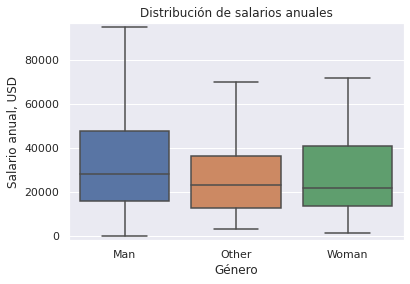

In [4]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Gender", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Género')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

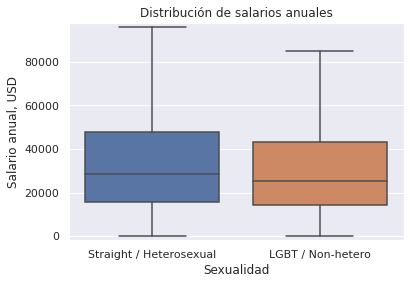

In [5]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Sexuality", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Sexualidad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

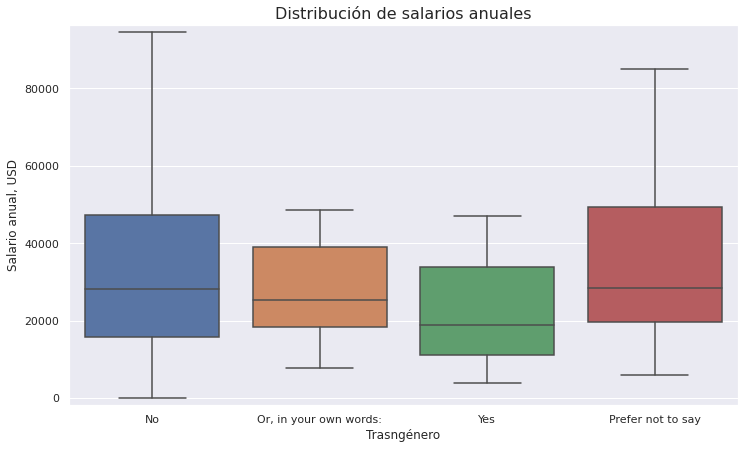

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x="Trans", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales', size=16)
plt.xlabel('Trasngénero')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

- Específicamente los que dijeron `Yes` son los que menos ganan.

**Ideas**

* Los hombres ganan un poco más según la gráfica. Probémoslo o rechacémoslo con test de hipótesis. Lo mismo para sexualidad y personas que se definen como transgénero.

### Edades y salarios

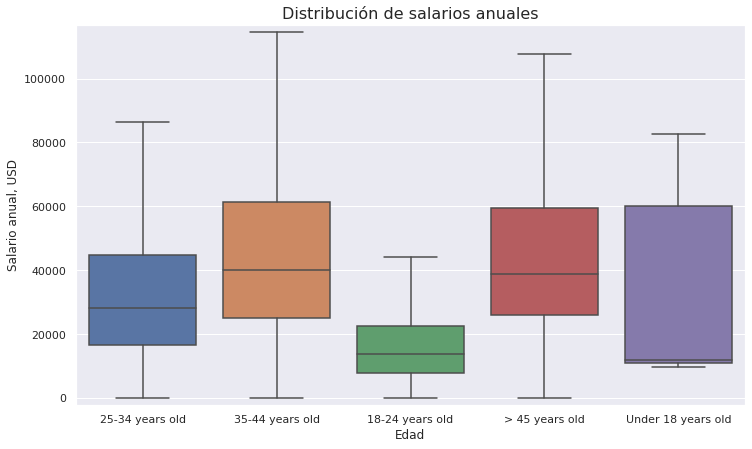

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x="Age", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales', size=16)
plt.xlabel('Edad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

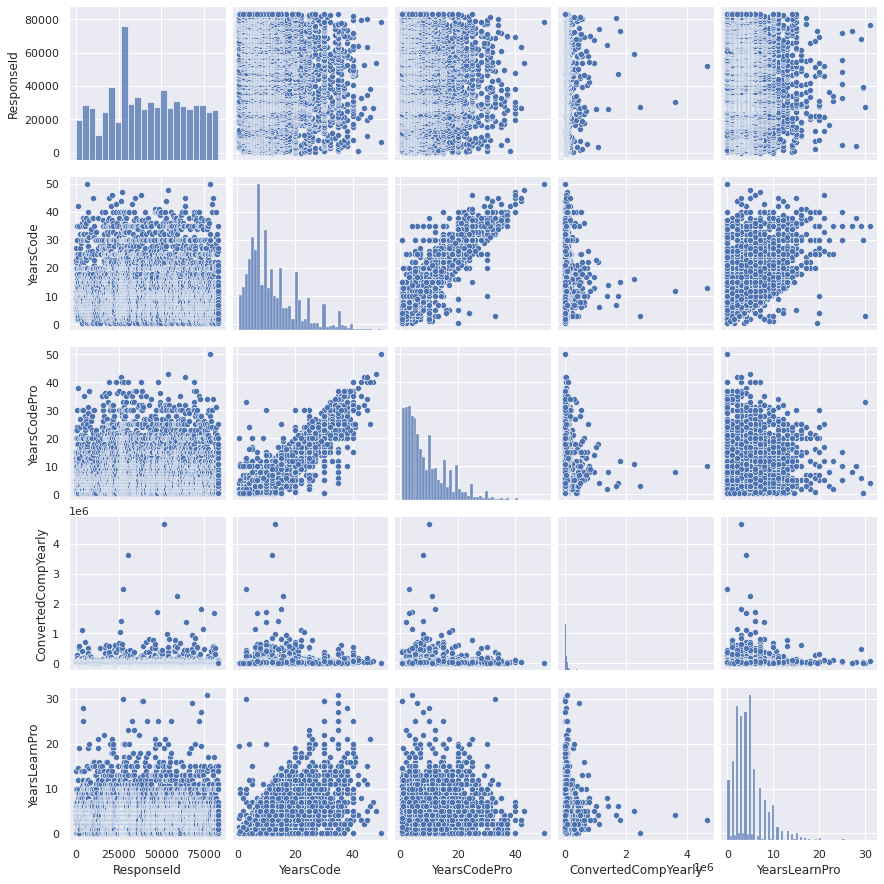

In [8]:
#sns.pairplot(df[['YearsCode', 'YearsCodePro', 'ConvertedCompYearly']], hue=df['Gender'])
sns.pairplot(df)

In [9]:
df.corr()

,ResponseId,YearsCode,YearsCodePro,ConvertedCompYearly,YearsLearnPro
ResponseId,1.000000,-0.048735,-0.024430,0.020287,-0.025331
YearsCode,-0.048735,1.000000,0.894758,0.090878,0.487761
YearsCodePro,-0.024430,0.894758,1.000000,0.088646,0.115675
ConvertedCompYearly,0.020287,0.090878,0.088646,1.000000,0.024953
YearsLearnPro,-0.025331,0.487761,0.115675,0.024953,1.000000


### Dónde aprendieron y salario

Comparar la distribución de salarios de universidad y métodos no tradicionales. También por rangos de edad

In [10]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].agg(lambda x: stats.trim_mean(x, 0.2))

Age                 LearnCode      
18-24 years old     Both                        NaN
                    Non-traditional             NaN
                    Traditional                 NaN
25-34 years old     Both               39197.728296
                    Non-traditional             NaN
                    Traditional        48705.062857
35-44 years old     Both               59254.393846
                    Non-traditional             NaN
                    Traditional                 NaN
> 45 years old      Both                        NaN
                    Non-traditional             NaN
                    Traditional                 NaN
Under 18 years old  Both                        NaN
                    Non-traditional             NaN
                    Traditional                 NaN
Name: ConvertedCompYearly, dtype: float64

In [11]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].mean().round(2)

Age                 LearnCode      
18-24 years old     Both               18333.27
                    Non-traditional    19006.74
                    Traditional        27990.52
25-34 years old     Both               44146.97
                    Non-traditional    51018.76
                    Traditional        71443.70
35-44 years old     Both               56220.59
                    Non-traditional    74909.93
                    Traditional        65226.29
> 45 years old      Both               53990.01
                    Non-traditional    59525.56
                    Traditional        50094.25
Under 18 years old  Both               11760.00
                    Non-traditional    40851.00
                    Traditional             NaN
Name: ConvertedCompYearly, dtype: float64

In [12]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].count()

Age                 LearnCode      
18-24 years old     Both                347
                    Non-traditional     383
                    Traditional          81
25-34 years old     Both                855
                    Non-traditional    1083
                    Traditional         237
35-44 years old     Both                438
                    Non-traditional     502
                    Traditional         107
> 45 years old      Both                126
                    Non-traditional     191
                    Traditional          20
Under 18 years old  Both                  1
                    Non-traditional       4
                    Traditional           0
Name: ConvertedCompYearly, dtype: int64

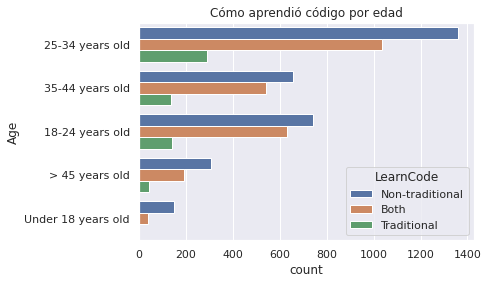

In [13]:
sns.countplot(y=df.Age, hue=df.LearnCode, hue_order=['Non-traditional', 'Both', 'Traditional'])
plt.title('Cómo aprendió código por edad')
plt.show()

- Para todos los rangos de edad la forma de aprender a programar se comporta igual, la mayoría aprendieron a programar de maneras no tradicionales

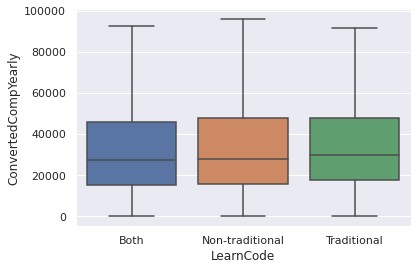

In [14]:
sns.boxplot(x=df.LearnCode, y=df.ConvertedCompYearly, showfliers=False)
plt.show()

In [15]:
#df[['EdLevel', 'ConvertedCompYearly']].
median_salary = df.groupby('EdLevel')[['ConvertedCompYearly']].agg(np.median).sort_values(by='ConvertedCompYearly', ascending=False)

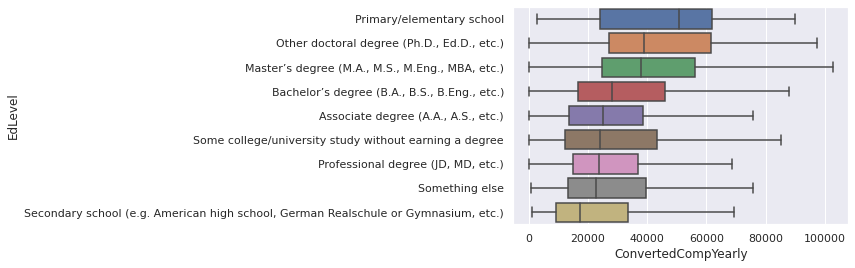

In [16]:
sns.boxplot(y=df.EdLevel, 
            x=df.ConvertedCompYearly, 
            order=list(median_salary.index), 
            showfliers=False)
plt.show()

Wtf, qué está pasando aquí jaja primary school tiene el top salarios y secondart school el mínimo (aquí solo hubo una respuesta, la pregunta es el máximo nivel de estudios). Para tomar en cuenta, ver el número de registros:

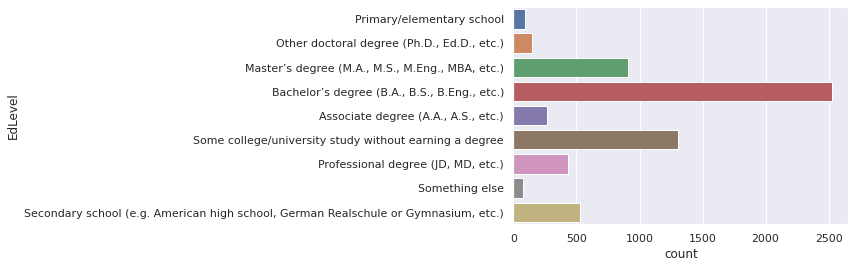

In [17]:
sns.countplot(y=df.EdLevel, order=list(median_salary.index))
plt.show()

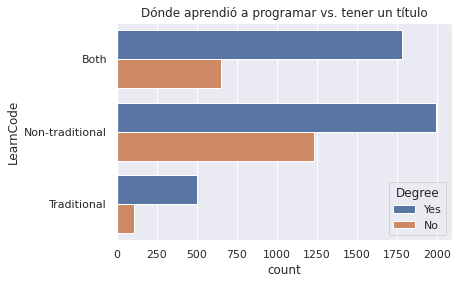

In [18]:
# Degree or EdLevel and LearnCode
sns.countplot(y=df.LearnCode, hue=df.Degree)
plt.title('Dónde aprendió a programar vs. tener un título')
plt.show()

#### Tienen empleo o no según tipo de educación

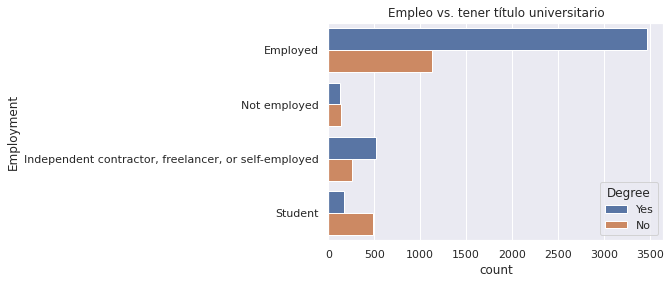

In [19]:
# Degree and Employment
sns.countplot(y=df.Employment, hue=df.Degree)
plt.title('Empleo vs. tener título universitario')
plt.show()

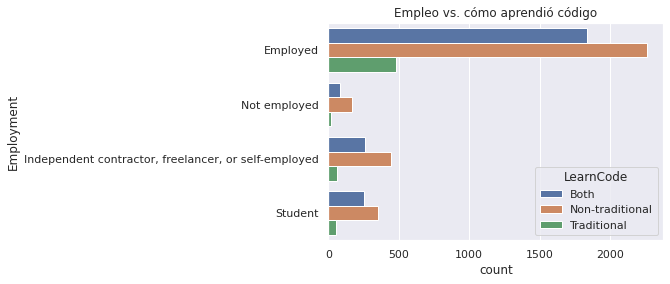

In [20]:
# LearnCode and Employment
sns.countplot(y=df.Employment, hue=df.LearnCode)
plt.title('Empleo vs. cómo aprendió código')
plt.show()

## Preguntas para prueba de hipótesis

1. ¿Si voy a la universidad, es más probable que consiga empleo?
1. ¿Si tengo título gano más que si no?
2. ¿Si aprendo código solo de la manera tradicional gano más que si no?
3. ¿Gano más si aprendo combinando tradicional y no tradicional?
5. Misma pregunta pero para rangos de edad bajos

Extra:
¿Por qué primary school está en el top y secundary school al final?


## 1. ¿Si voy a la universidad, es más probable que consiga empleo?

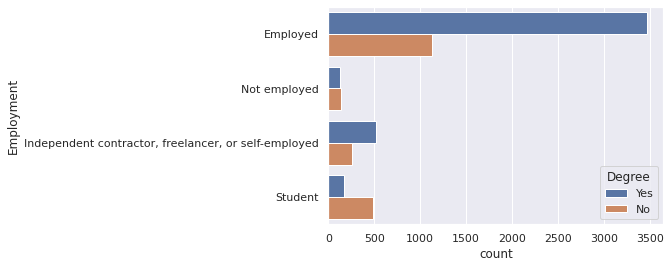

In [21]:
sns.countplot(y=df.Employment, hue=df.Degree)
plt.show()

- Hay un porcentaje importante de personas que no tienen título porque son estudiantes aún
- De las personas que no tienen empleo, hay más que no tienen título

### 2. ¿Si tengo título gano más que si no?

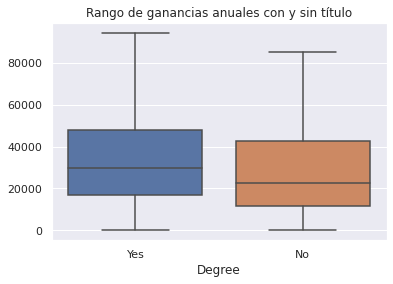

In [22]:
sns.boxplot(x=df.Degree, y=df.ConvertedCompYearly, showfliers=False)
plt.title('Rango de ganancias anuales con y sin título')
plt.ylabel(None)
plt.show()

In [23]:
df.Degree.value_counts(normalize=True)

Yes    0.681811
No     0.318189
Name: Degree, dtype: float64

#### Test numpy vs. scipy (será eliminado luego)

##### Establecer la hipótesis nula:
- **Hipótesis nula (Ho):** los salarios _son los mismos_ para personas con o sin título.
- **Hipótesis alternativa (Ha):** los salarios son _más altos_ para personas con título.

##### Estadístico de prueba:
- Resta de las timmed means 0.2

##### Bootstrap:
- Se puede simular con permutación.

In [24]:
# Funciones de NumPy para permutation
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


def diff_of_trim_means(data_1, data_2):
    """Difference in means of two arrays."""

    diff = stats.trim_mean(data_1, 0.2) - stats.trim_mean(data_2, 0.2)

    return diff

In [25]:
# Diferencia entre las ganancias anuales
s_has_degree = df.ConvertedCompYearly[(df.Degree == 'Yes') & (df.ConvertedCompYearly.notnull())]
s_not_degree = df.ConvertedCompYearly[(df.Degree == 'No') & (df.ConvertedCompYearly.notnull())]
diff_trim_mean = stats.trim_mean(s_has_degree, 0.2) - stats.trim_mean(s_not_degree, 0.2)

print(np.mean(s_has_degree)-np.mean(s_not_degree))
print(np.median(s_has_degree)-np.median(s_not_degree))
print(stats.trim_mean(s_has_degree, 0.2)-stats.trim_mean(s_not_degree, 0.2))

9137.226666994276
6814.5
6173.385154858501


In [26]:
perm_replicates = draw_perm_reps(s_has_degree, s_not_degree, diff_of_trim_means, size=10000)
print(diff_trim_mean)
np.sum(perm_replicates >= diff_trim_mean)/len(perm_replicates)

6173.385154858501


0.0

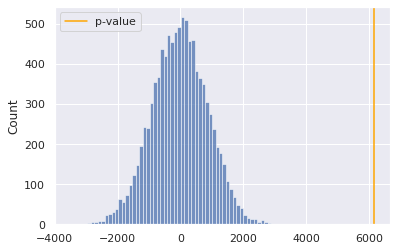

In [33]:
sns.histplot(x=perm_replicates)
plt.axvline(x=diff_trim_mean, color='orange', label='p-value')
plt.legend()
plt.show()

Las probabilidades de que el salario fuera el mismo son casi nulas. En la distribución se muestra como los casos más extremos casi llegan a 3k de diferencia de salario, el valor observado es de 6k.

¿Cómo se hace esto en scipy?

In [50]:
# Tests whether the means of two independent samples are significantly different.
# Observation: Observations in each sample are normally distributed.
stats.ttest_ind(s_has_degree, s_not_degree, equal_var=False, alternative='greater')

Ttest_indResult(statistic=1.989893996985878, pvalue=0.02336944217514069)

In [49]:
# Test if has a normal distribution
print(stats.shapiro(s_has_degree))
print(stats.shapiro(s_not_degree))

ShapiroResult(statistic=0.20545274019241333, pvalue=0.0)
ShapiroResult(statistic=0.17611545324325562, pvalue=0.0)


Las distribuciones no son normales, no se puede aplicar ttest_ind

In [53]:
from hypothesize.utilities import trim_mean
from hypothesize.compare_groups_with_single_factor import pb2gen

In [54]:
pb2gen(s_has_degree, s_not_degree, trim_mean, .2)

{'est_1': 31090.308467741936,
 'est_2': 24916.923312883435,
 'est_dif': 6173.385154858501,
 'ci': [4500.092154413222, 7832.625473110034],
 'p_value': 0.0,
 'variance': 756790.630560741,
 'n1': 3304,
 'n2': 1084}

Este último test no está en scipy, pero usa bootstrap. Voy a testear qué tan parecidos son:

In [157]:
data1 = np.random.normal(20, 40, size=100)
data2 = np.random.normal(10, 15, size=100)
d = pd.DataFrame({'data1': data1, 'data2': data2})
perm_replicates = draw_perm_reps(d.data1, d.data2, diff_of_trim_means, size=10000)
dif=stats.trim_mean(data1, 0.2) - stats.trim_mean(data2, 0.2)
print(f'dif mean = {dif}')
pvalue = np.sum(perm_replicates >= dif)/len(perm_replicates)
print(f'p-vale = {pvalue}')

dif mean = 4.638161515563967
p-vale = 0.0804


In [158]:
pb2gen(d.data1, d.data2, trim_mean, .2, nboot=10000)

{'est_1': 14.74317725950769,
 'est_2': 10.105015743943722,
 'est_dif': 4.638161515563967,
 'ci': [-3.280937568181309, 12.339170436204698],
 'p_value': 0.2534,
 'variance': 15.643730843943759,
 'n1': 100,
 'n2': 100}

### ¿Los hombres ganan más que las mujeres?

In [129]:
man_salary = df[df['Gender'] == 'Man']['ConvertedCompYearly'].dropna()
woman_salary = df[df['Gender'] == 'Woman']['ConvertedCompYearly'].dropna()

In [134]:
man_salary

0       46482.0
2       60480.0
3       58373.0
4       21620.0
5       38915.0
         ...   
6290    27492.0
6291    68721.0
6292    41232.0
6293    18326.0
6294    21168.0
Name: ConvertedCompYearly, Length: 4128, dtype: float64

In [135]:
pb2gen(man_salary, woman_salary, trim_mean, 0.2, nboot=10000)

{'est_1': 30000.73607748184,
 'est_2': 24399.78,
 'est_dif': 5600.956077481842,
 'ci': [1997.5533333333333, 8841.349378531071],
 'p_value': 0.0022,
 'variance': 3084596.963134971,
 'n1': 4128,
 'n2': 164}

In [152]:
trans_salary = df[df['Trans'] == 'Yes']['ConvertedCompYearly'].dropna()
no_trans_salary = df[df['Trans'] == 'No']['ConvertedCompYearly'].dropna()

In [156]:
pb2gen(no_trans_salary, trans_salary, trim_mean, 0.2, nboot=10000)

{'est_1': 29641.37815779246,
 'est_2': 21495.5,
 'est_dif': 8145.87815779246,
 'ci': [-158.87514574426677, 14754.300621842209],
 'p_value': 0.0538,
 'variance': 14594319.843921743,
 'n1': 4287,
 'n2': 26}

In [ ]:
df[df['Trans'] == 'Yes']['ConvertedCompYearly'].dropna()

In [166]:
df.Sexuality.unique()

array(['Straight / Heterosexual', 'LGBT / Non-hetero'], dtype=object)

#### Preguntas posibles relacionadas al tema

- Education lvl vs. dónde aprendió a programar
- Salarios por rango de edad
- Salarios según dónde se aprendió a programar
- ¿Si tengo título gano más que si no?
- Qué cargos tienes según dónde estudiaste
- Cuánto tiempo te tomó desde que aprendiste código hasta que programaste profesionalmente? (dónde aprendiste a programar)
- Las personas que aprendieron a programar más jóvenes, ganan más? Qué puesto tienen? (contestar según rangos de edad)


#### Otras preguntas

- Diferencia de salario entre trans y heteros (y si fueron a las universidades)?
- Diferencia de salario entre hombres y mujeres
- Lenguajes de programación aprendidos por tipo de aprendizaje

- Extraer algo para mejorar esto y cerrar la brecha

#### Accionables:
- Cómo disminuir esta brecha de género

#### To-Do
- Dividir el análisis por partes o por preguntas
- Crear una (o varias) función para plotear
- Crear un notebook con el código escondido, que sea solo de reporte y gráficas

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>